In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Context
This dataset includes A/B test results of Cookie Cats to examine what happens when the first gate in the game was moved from level 30 to level 40. When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

## Content
The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

* userid: A unique number that identifies each player.
* version: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
* sum_gamerounds: the number of game rounds played by the player during the first 14 days after install.
* retention_1: Did the player come back and play 1 day after installing?
* retention_7: Did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either.

In [2]:
d = pd.read_csv('data/GAME-stats.csv')
d.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
d['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [4]:
d['sum_gamerounds'].nlargest(10)

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
46344     2251
87007     2156
36933     2124
88328     2063
6536      2015
Name: sum_gamerounds, dtype: int64

In [5]:
above_500 = d[d['sum_gamerounds'] > 500]['sum_gamerounds'].count()
below_500 = d[d['sum_gamerounds'] < 500]['sum_gamerounds'].count()

above_500, below_500

(856, 89329)

In [6]:
d.drop(d[d['sum_gamerounds'] > 500].index, inplace=True)
d['sum_gamerounds'].describe()

count    89333.000000
mean        44.740801
std         72.476563
min          0.000000
25%          5.000000
50%         16.000000
75%         49.000000
max        500.000000
Name: sum_gamerounds, dtype: float64

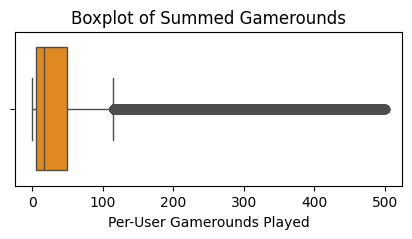

In [7]:

plt.figure(figsize=(5, 2))
sns.boxplot(x=d['sum_gamerounds'], color='darkorange').set(
    xlabel='Per-User Gamerounds Played', title='Boxplot of Summed Gamerounds')
plt.show()

In [8]:
Gate30_Day1 = d[d['version'] == 'gate_30']['retention_1'].tolist()
Gate40_Day1 = d[d['version'] == 'gate_40']['retention_1'].tolist()
Gate30_Day7 = d[d['version'] == 'gate_30']['retention_7'].tolist()
Gate40_Day7 = d[d['version'] == 'gate_40']['retention_7'].tolist()

In [9]:
# Performing the t-test
t, p = ttest_ind(Gate30_Day1, Gate40_Day1)

# Printing the result

print('Statistical Test for Day 1 Retention')
print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

Statistical Test for Day 1 Retention
t = 1.789
p = 0.074
Statistical Test for Day 1 Retention
t = 1.789
p = 0.074


In [10]:
# Performing the t-test
t, p = ttest_ind(Gate30_Day7, Gate40_Day7)

# Printing the result
print('Statistical Test for Day 7 Retention')
print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

Statistical Test for Day 7 Retention
t = 3.246
p = 0.001
Statistical Test for Day 7 Retention
t = 3.246
p = 0.001


In [11]:
Gate30 = d[d['version'] == 'gate_30']
Gate40 = d[d['version'] == 'gate_40']
Gate30['retention_1'].value_counts()[True]
Gate30['retention_7'].value_counts()[True]
Gate40['retention_1'].value_counts()[True]
Gate40['retention_7'].value_counts()[True]

stages = ["Downloaded Game", "1 Day Retention", "7 Day Retention"]
g_30 = pd.DataFrame(dict(number=[len(Gate30), 
                                 Gate30['retention_1'].value_counts()[True], 
                                 Gate30['retention_7'].value_counts()[True]], 
                                 stage=stages))
g_30['version'] = 'Gate 30'
g_40 = pd.DataFrame(dict(number=[len(Gate40), 
                                 Gate40['retention_1'].value_counts()[True], 
                                 Gate40['retention_7'].value_counts()[True]], 
                                 stage=stages))
g_40['version'] = 'Gate 40'
df = pd.concat([g_30, g_40], axis=0)
fig = px.funnel(df, x='number', y='stage', color='version', color_discrete_sequence=px.colors.qualitative.Safe,
                title='Funnel Chart of Game Retention by Version', 
                labels={'number':'Number of Players','version':'Game Version','stage':'Retention Point'})
fig.update_layout(title_x=0.5, 
                  font=dict(
                      size=14,
                      )
)
fig.show()

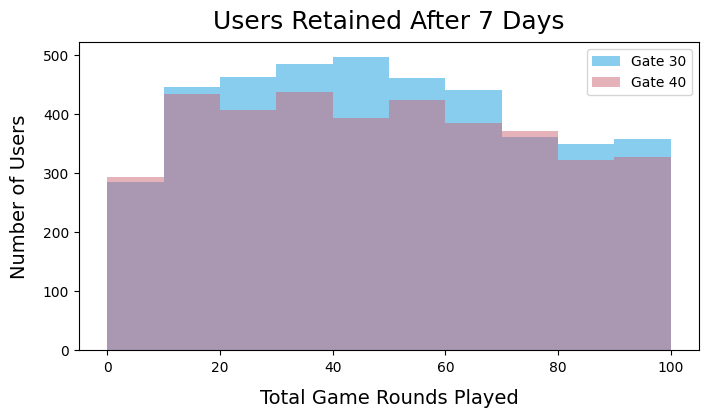

In [12]:
# further segment to bulk of players
Gate30_7True = Gate30[(Gate30['retention_7'] == True) & (Gate30['sum_gamerounds'] <= 100)]
Gate40_7True = Gate40[(Gate40['retention_7'] == True) & (Gate40['sum_gamerounds'] <= 100)]

# Plotting the data
plt.figure(figsize=(8, 4))
plt.hist(Gate30_7True['sum_gamerounds'], alpha=1, label='Gate 30', color='#88CCEE')
plt.hist(Gate40_7True['sum_gamerounds'], alpha=0.5, label='Gate 40', color='#CC6677')
plt.legend(loc='upper right')
plt.title('Users Retained After 7 Days', fontsize=18, pad=10)
plt.xlabel('Total Game Rounds Played', fontsize=14, labelpad=10)
plt.ylabel('Number of Users', fontsize=14, labelpad=10)
plt.show()